In [2]:
from matplotlib import pyplot as plt
import numpy as np

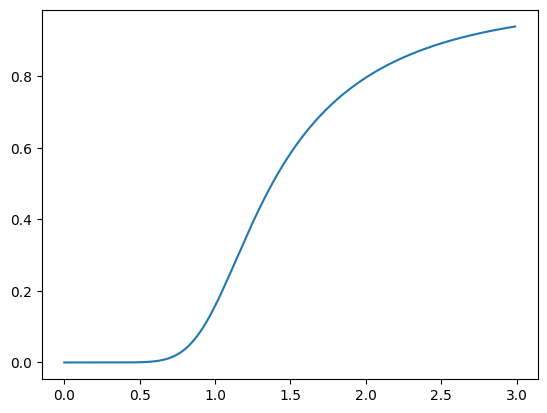

In [38]:
# Problem 6.10
def f(c,x):
    return 1 - np.exp(-c*x)

c = np.arange(0,3,0.01)
x = [1]*len(c)
n = 10

for k in range(len(c)):
    for i in range(n):
        x[k] = f(c[k],x[k])

plt.plot(c,x)

In [39]:
# Problem 6.11b
def f(c,x):
    return 1 - np.exp(-c*x)

c = 2
x = 1
tol = 1e-6
max_iter = 10000
n = 10
xtrue = 1 #starting guess

# find accurate x by iterating many times
for i in range(20):
    x = f(c,x)
xtrue = x
print("Reference xtrue (from iteration):", xtrue)

x = 1 # reinitialize
err = np.abs(x-xtrue)
j = 0 #counter
while (err > tol and j < max_iter):
    x = f(c,x)
    err = np.abs(x - xtrue)
    j += 1
print("Relaxation final err:", err, "iterations:", j)

# Problem 6.11c 

w = 0.5 #starting value
x = 1.0 # reinitialize
err = np.abs(x-xtrue)
j = 0 #counter
while (err > tol and j < max_iter):
    x = (1+w)*f(c,x)-w*x # overrelaxation equation
    err = x - xtrue
    j += 1
print("Overrelax w=0.5 final err:", err, "iterations:", j)

# try for many w
ws = np.linspace(0,3,20)
results = []
for w in ws:
    x = 1.0 # reinitialize
    err = np.abs(x-xtrue)
    j = 0 #counter
    while (err > tol and j < max_iter):
        x = (1+w)*f(c,x)-w*x # overrelaxation equation
        err = np.abs(x - xtrue)
        j += 1
    converged = (err <= tol)
    results.append((w,j,err,converged))

for w, j, err, conv in results:
    if conv:
        print(f"w={w:.6f} -> converged in {j} iterations (final err={err:.2e})")
    else:
        print(f"w={w:.6f} -> did NOT converge within {j} iters (final err={err:.2e})")

Reference xtrue (from iteration): 0.7968121322767707
Relaxation final err: 4.988350750245729e-07 iterations: 14
Overrelax w=0.5 final err: 2.4070649118357323e-07 iterations: 4
w=0.000000 -> converged in 14 iterations (final err=4.99e-07)
w=0.157895 -> converged in 11 iterations (final err=3.73e-07)
w=0.315789 -> converged in 8 iterations (final err=5.57e-07)
w=0.473684 -> converged in 5 iterations (final err=8.99e-07)
w=0.631579 -> converged in 4 iterations (final err=7.69e-07)
w=0.789474 -> converged in 5 iterations (final err=3.19e-07)
w=0.947368 -> converged in 7 iterations (final err=6.11e-07)
w=1.105263 -> converged in 9 iterations (final err=9.06e-07)
w=1.263158 -> converged in 12 iterations (final err=5.93e-07)
w=1.421053 -> converged in 15 iterations (final err=8.50e-07)
w=1.578947 -> converged in 20 iterations (final err=6.21e-07)
w=1.736842 -> converged in 26 iterations (final err=9.03e-07)
w=1.894737 -> converged in 37 iterations (final err=8.46e-07)
w=2.052632 -> converged 

Text(0, 0.5, 'f(x)')

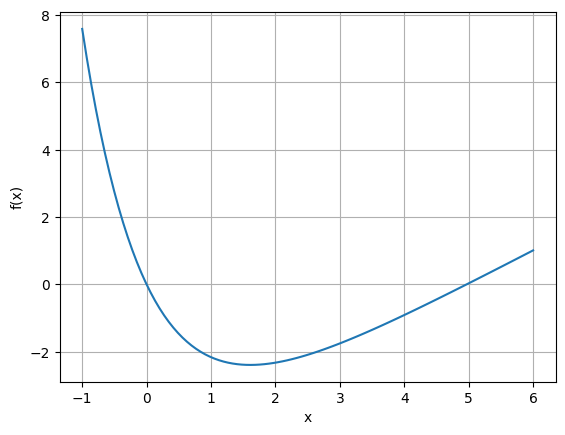

In [28]:
#Problem 6.13 Wien's displacement constant

def f(x):
    return 5*np.exp(-x)+x-5
# plot f(x) to get good guess for x1, x2
# use fact that 0 is obvious root
xrange = np.linspace(-1,6,100)
yrange = [f(x) for x in xrange]
plt.plot(xrange,yrange)
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")

In [29]:
# since x = 0 root is obvious, look for root between x=4.5 and x=5.5
x1 = 4.5
x2 = 5.5
print(f(x1),f(x2)) # check for oposite signs
elim = 1e-6 # given error limit
e = 1 # starting value
while (e > elim):
    xmid = 0.5*(x1+x2)
    fmid = f(xmid)
    if(f(xmid)<0 and f(x1)<0) or(f(xmid)>0 and f(x1)>0):
        x1 = xmid
    else:
        x2 = xmid
    e = np.abs(x1-x2)
xfinal = 0.5*(x1+x2)
print(xfinal)

-0.44445501730878867 0.5204338571923204
4.965114116668701


final parameters:  [1.99898588 1.99898588]


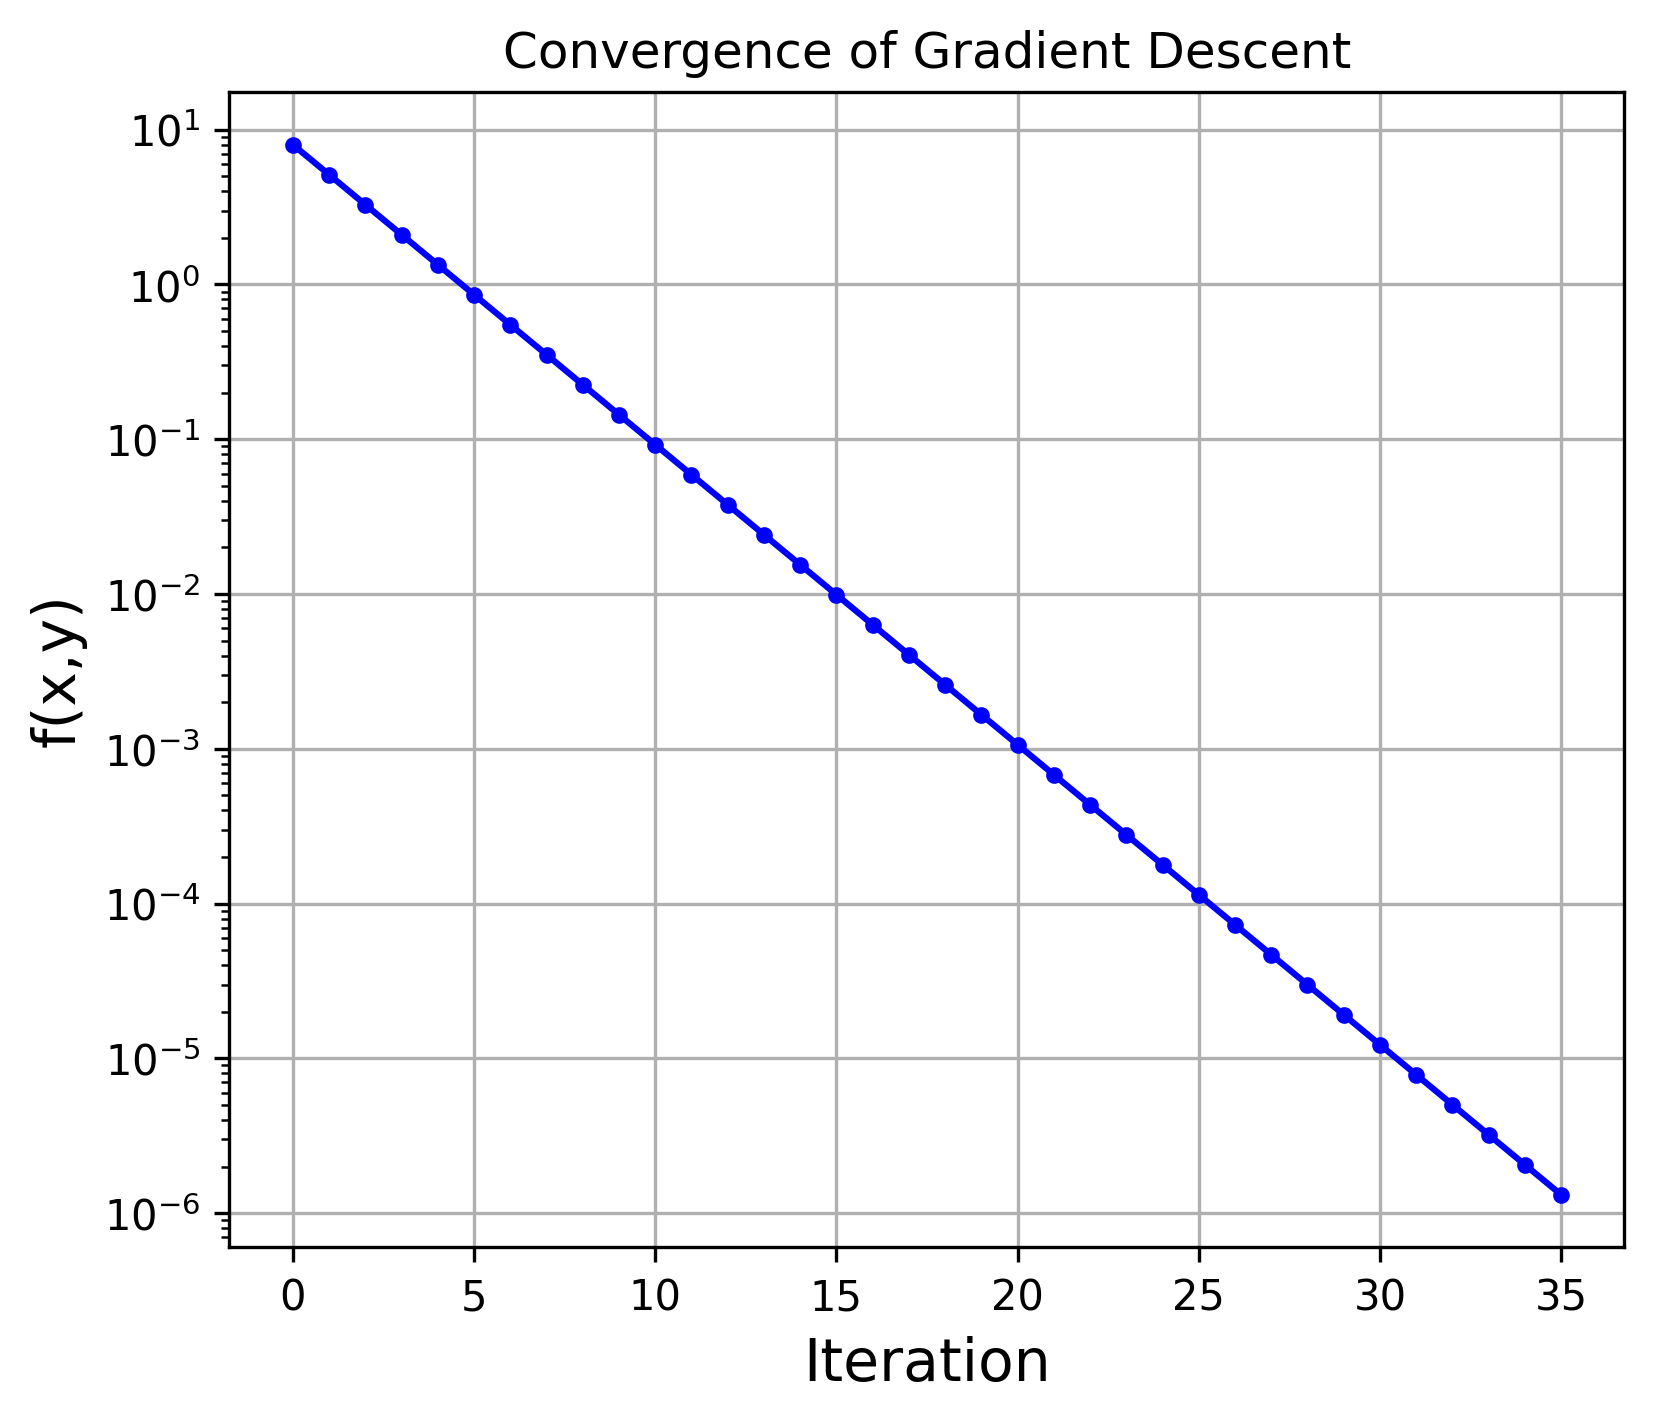

In [47]:
#Problem 3
def grad_fxn(f,ps,h=1e-6):
    grad = np.zeros_like(ps) # create array of grad in all dimensions
    for i in range(len(ps)):
        step = np.zeros_like(ps)
        step[i] = h
        grad[i] = (f(ps+step) - f(ps-step))/(2*h)
    return grad

# grad descent fxn
def grad_descent(f,init_params,step=0.1,tol=1e-6,iterations=100):
    params = np.array(init_params,dtype=float)
    history = [] 
    for i in range(iterations):
        val = f(params)
        history.append((params.copy(),val))
        grad = grad_fxn(f,params)

        new_params = params - step*grad
        new_val = f(new_params)
        if np.abs(new_val - val) < tol:
            history.append((new_params.copy(),new_val))
            break

        params = new_params
    return params, history

# test on f(x,y) = (x-2)^2 +(y-2)^2
def simple_fxn(params):
    x, y = params
    return (x-2)**2 + (y-2)**2

initial_guess = [0.0,0.0]
final_params, history = grad_descent(simple_fxn, initial_guess, 0.1)
print("final parameters: ", final_params)
values = [h[1] for h in history]
trajectory = [h[0] for h in history]

# plot fxn_value vs iteration
plt.figure(figsize=(6,5),dpi=300)
plt.semilogy(values, 'b.-')
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("f(x,y)",fontsize=14)
plt.title("Convergence of Gradient Descent")
plt.grid(True)
plt.savefig("hw2_figs/grad_descent_convergence.png",bbox_inches='tight')

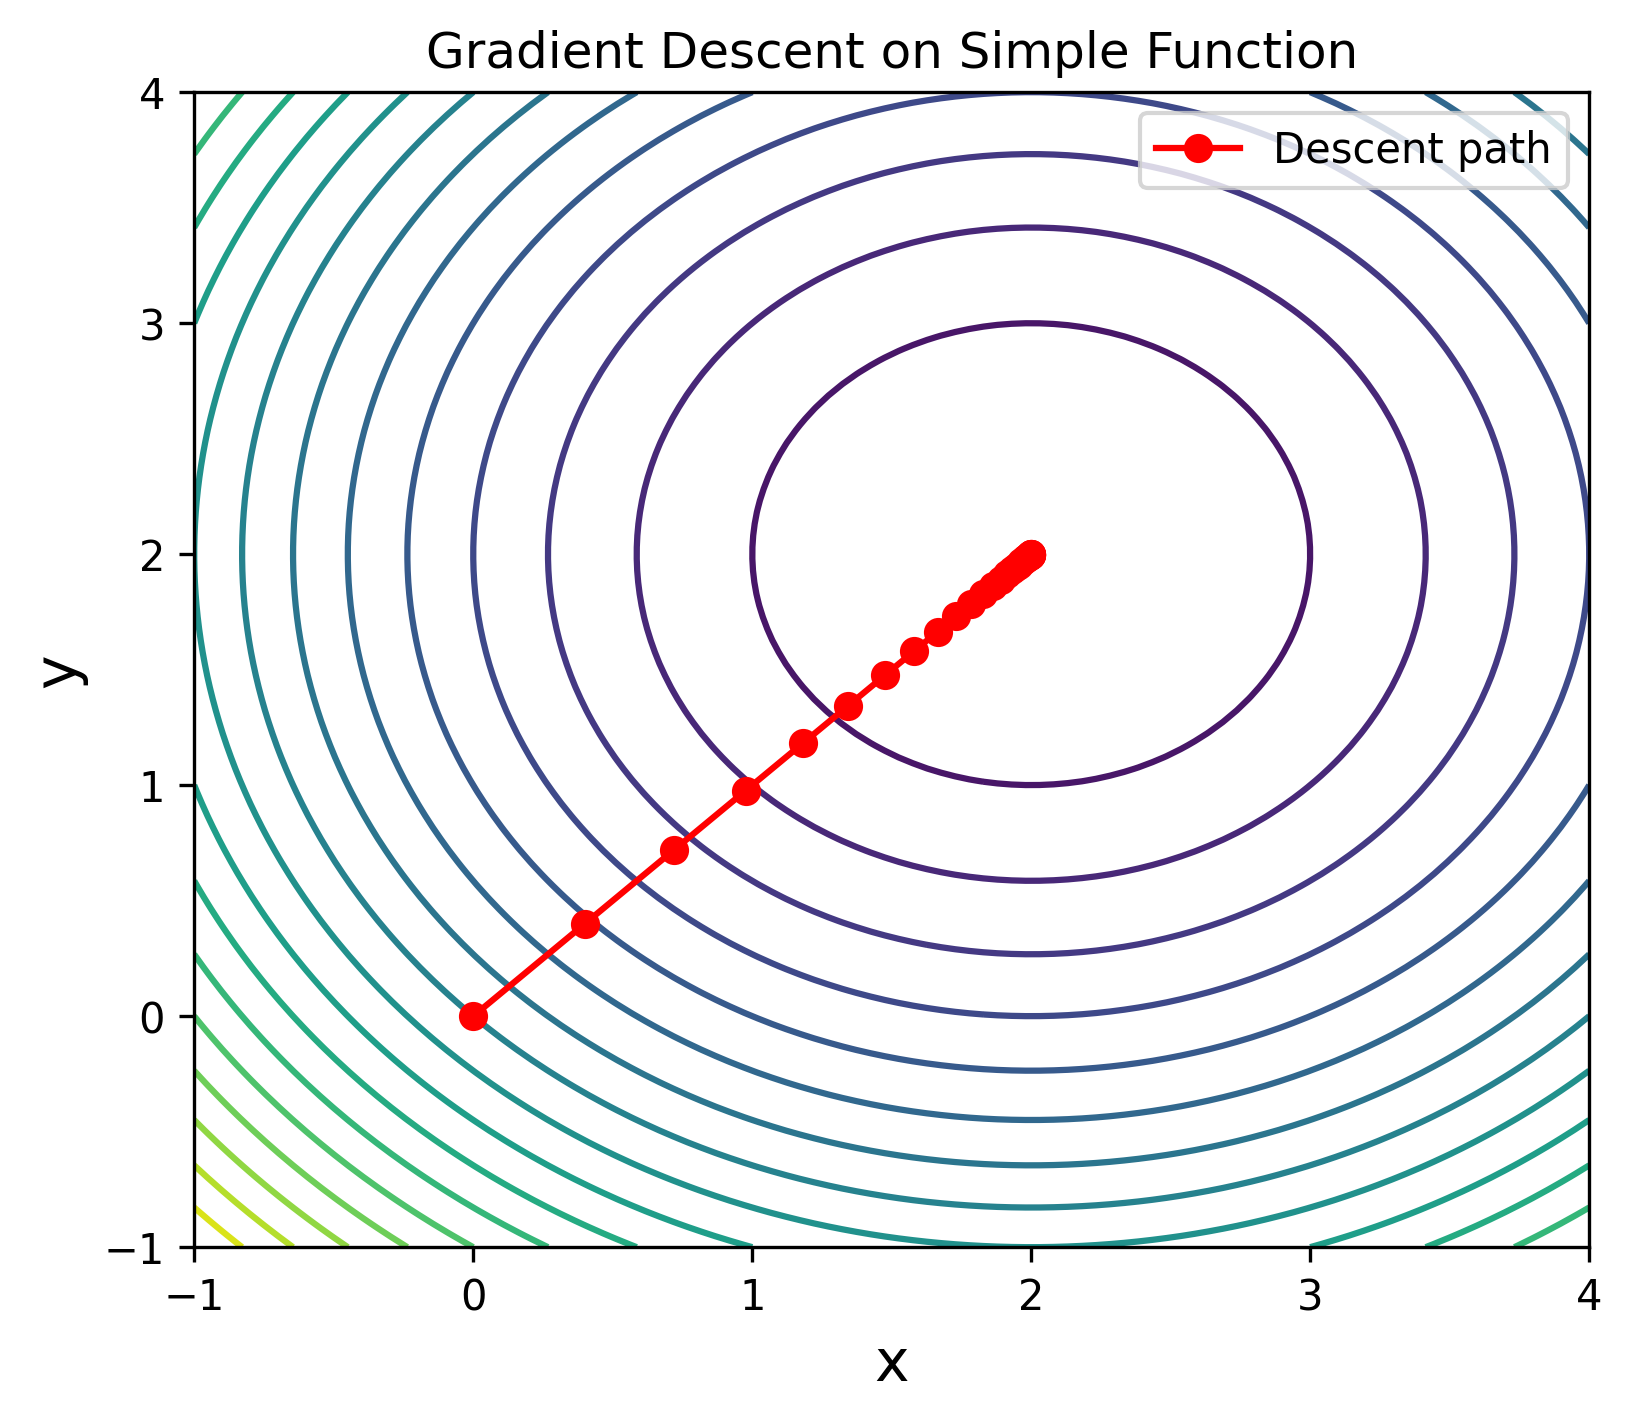

In [48]:
# plot contour plot
trajectory = np.array([p for p, val in history])

xgrid = np.linspace(-1, 4, 100)
ygrid = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(xgrid, ygrid)
Z = (X - 2)**2 + (Y - 2)**2

plt.figure(figsize=(6,5),dpi=300)
plt.contour(X, Y, Z, levels=20)
plt.plot(trajectory[:,0], trajectory[:,1], 'ro-', label="Descent path")
plt.xlabel("x",fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.title("Gradient Descent on Simple Function")
plt.savefig("hw2_figs/grad_descent_onfxn.png", bbox_inches='tight')

0 [-3. -1. 11.] 239.97947959323596
1 [-2.99348944 -1.00450143 11.00291068] 232.8258768424099
2 [-2.98691518 -1.0090732  11.00585232] 225.50789370320896
3 [-2.98028016 -1.01371421 11.00882326] 218.02983236397483
4 [-2.9735879  -1.01842292 11.01182152] 210.39759808240697
5 [-2.96684252 -1.02319727 11.01484478] 202.618906318809
6 [-2.96004888 -1.02803464 11.01789032] 194.70349767679292
7 [-2.95321255 -1.03293181 11.02095501] 186.66335565103603
8 [-2.94633997 -1.03788481 11.02403526] 178.5129203169961
9 [-2.93943843 -1.04288894 11.02712697] 170.26928894881954


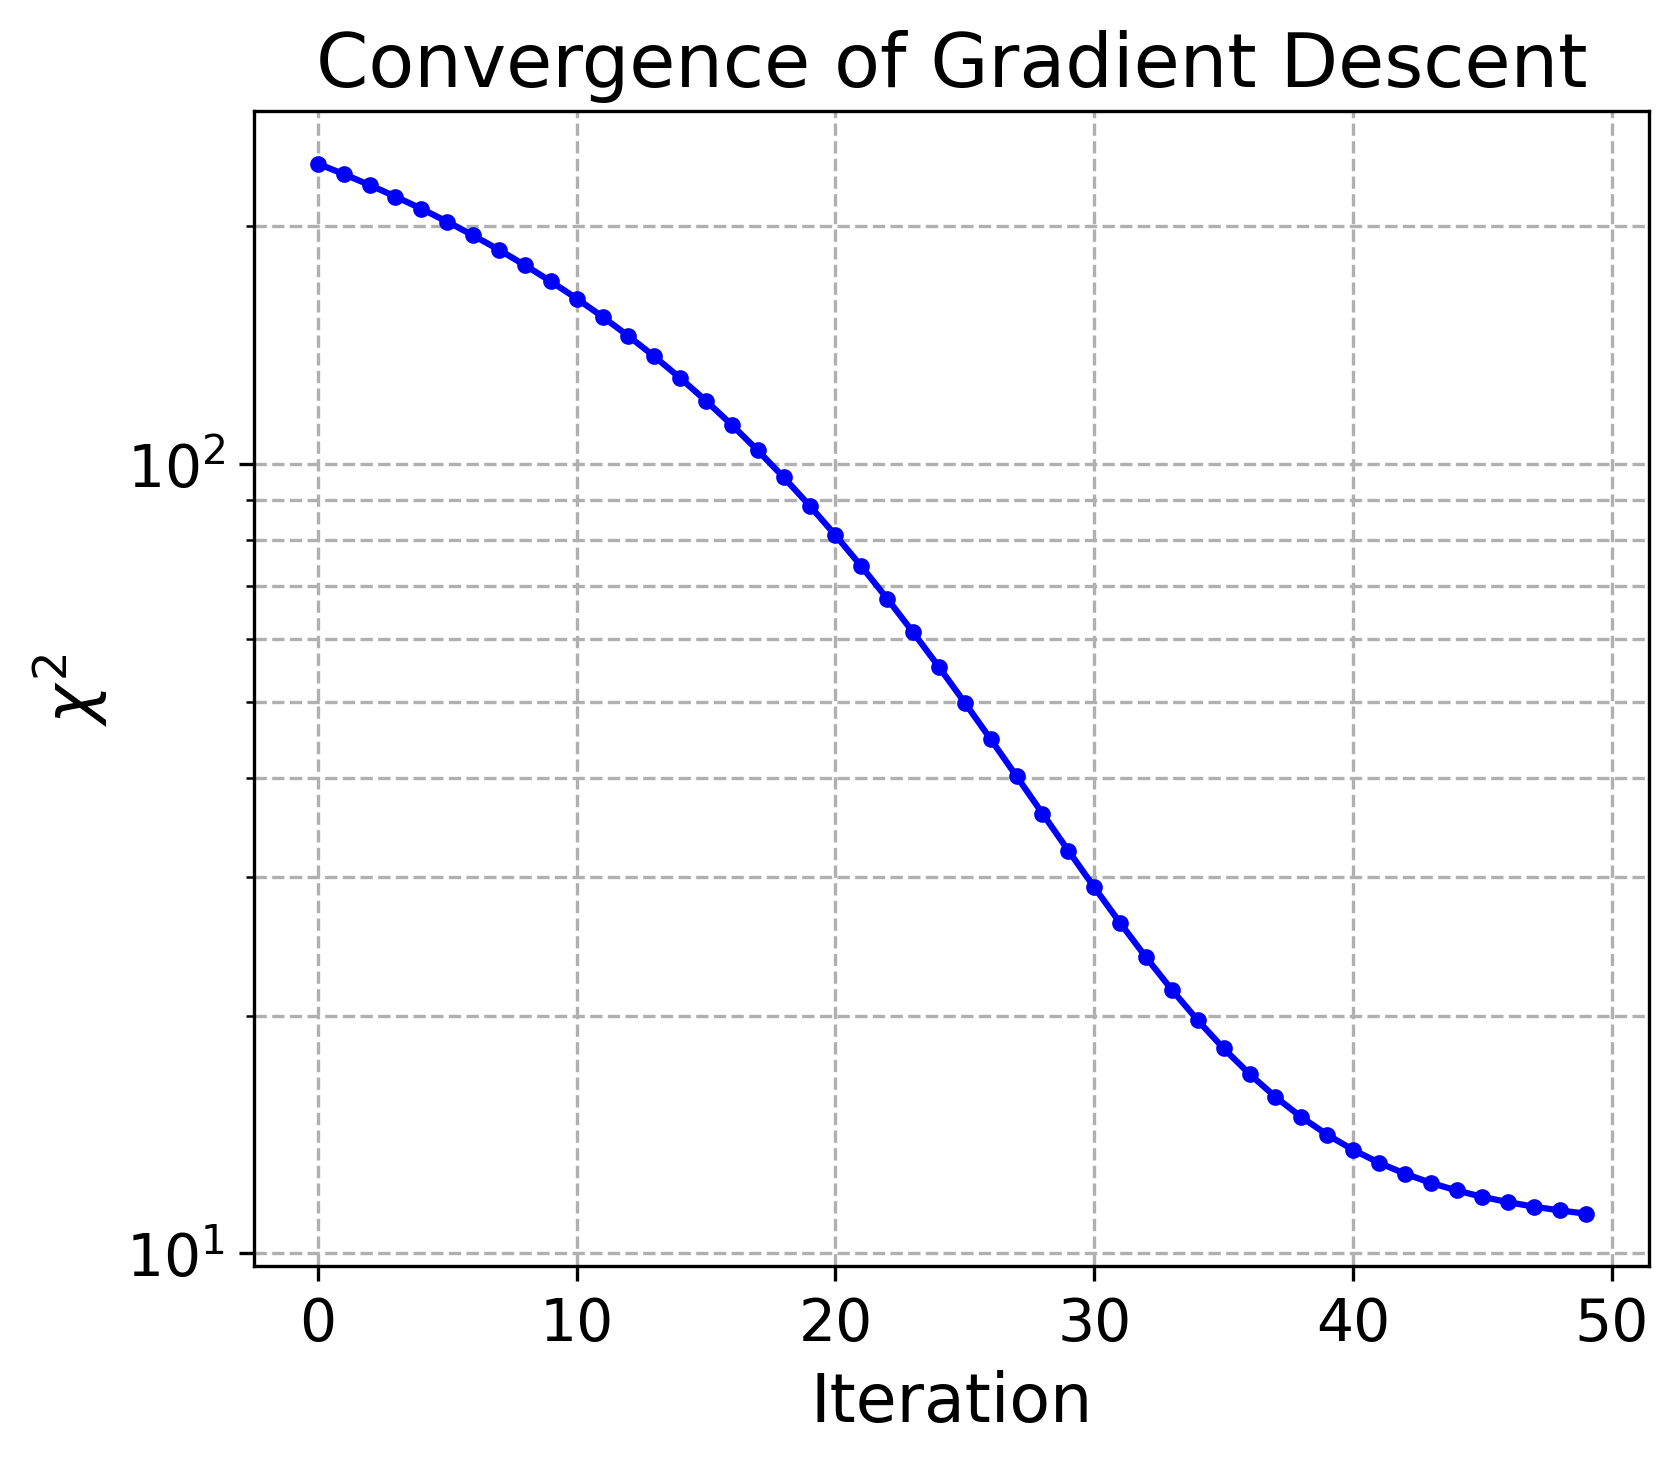

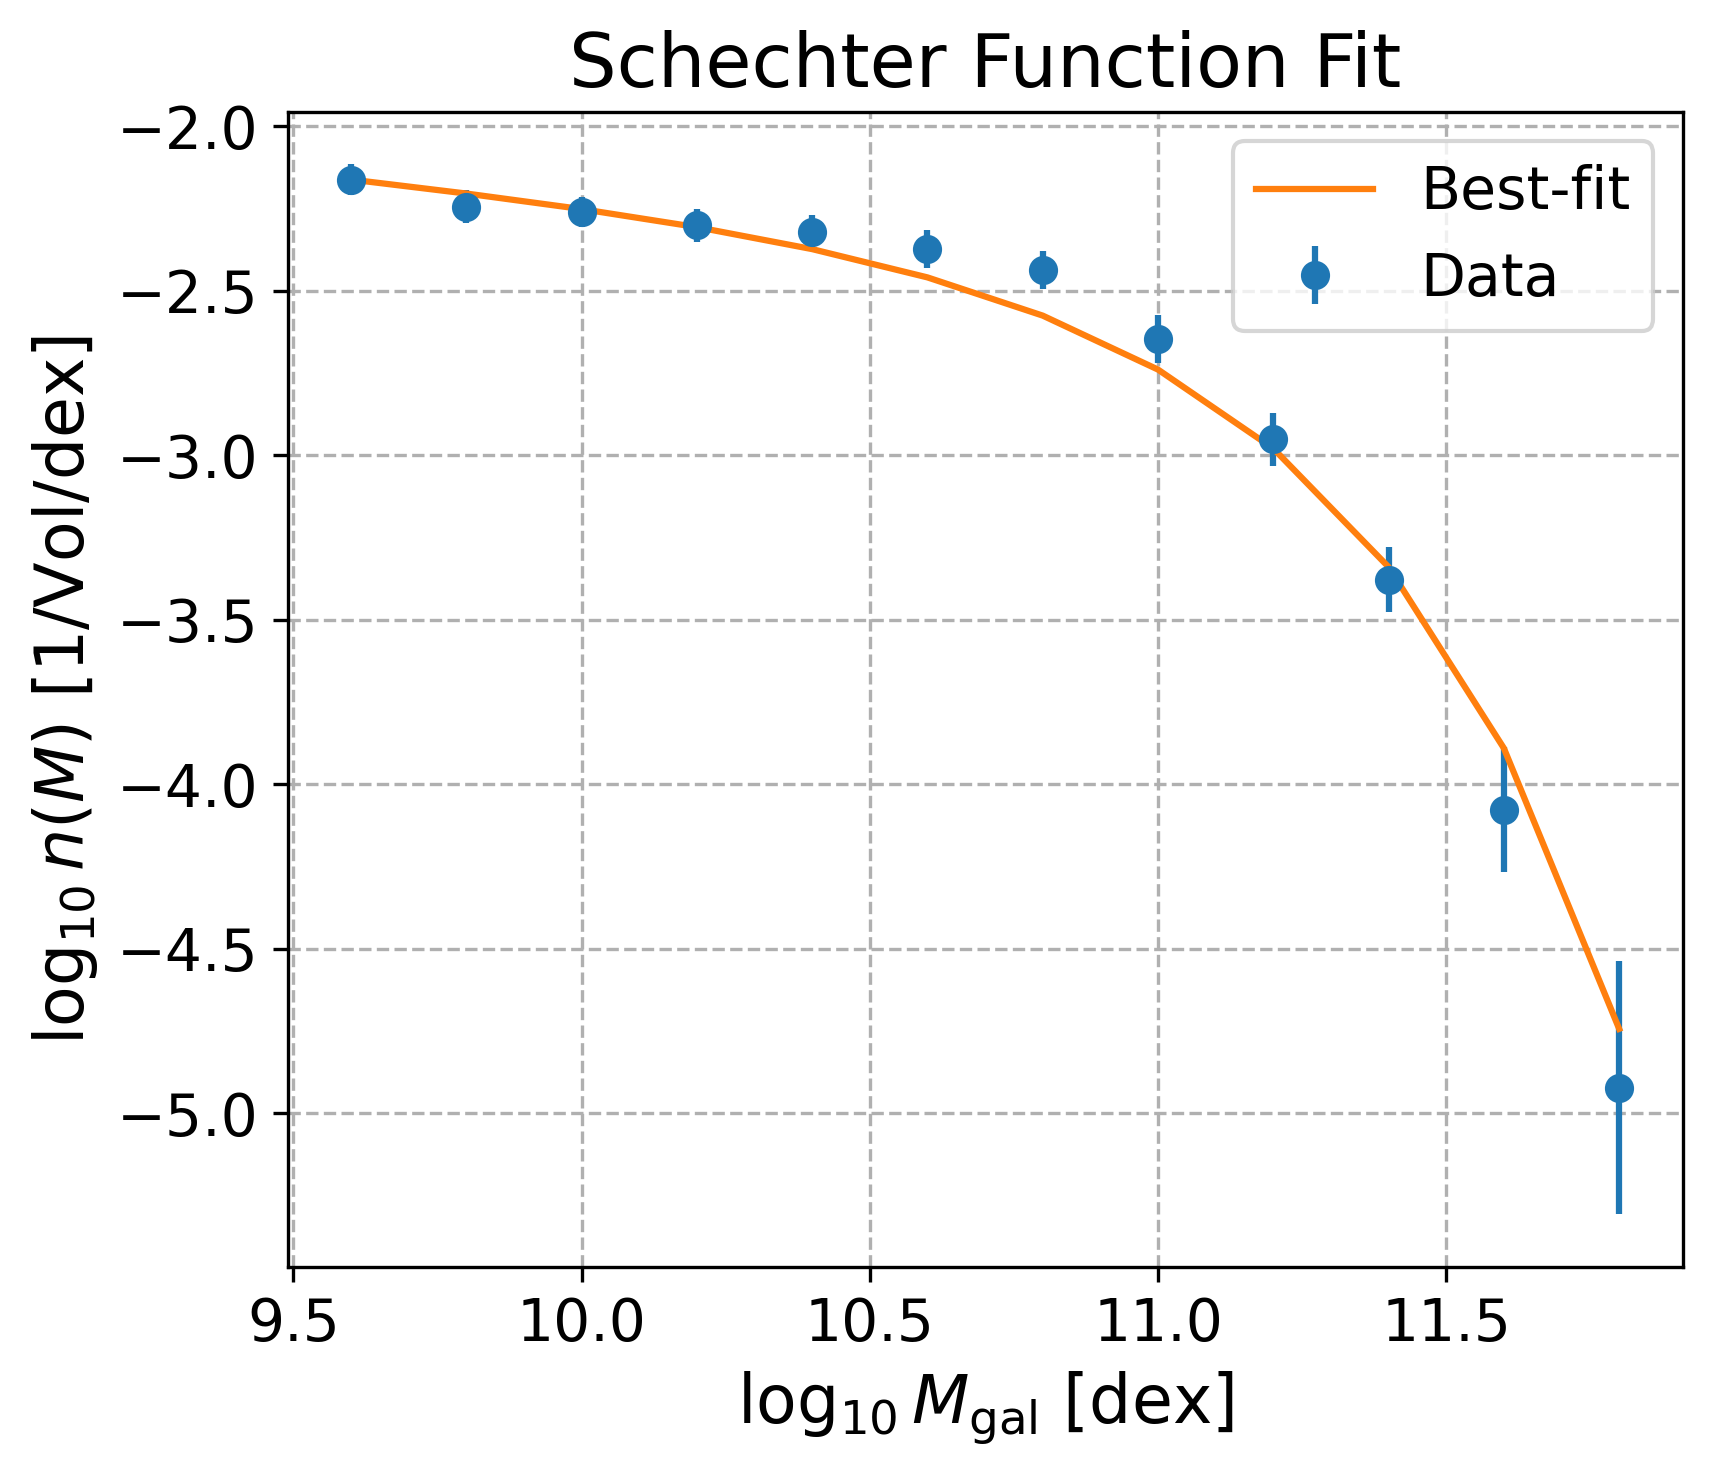

In [44]:
# Work on schechter fxn
def schechter(M, phi, Mstar, alpha):
    ratio = M / Mstar # stabilize overflow
    return phi * np.power(ratio, alpha+1) * np.exp(-ratio) * np.log(10)

def schechter_log(logMgal, logphi, alpha, logMstar):
    M = 10**logMgal
    Mstar = 10**logMstar
    phi = 10**logphi
    return phi * (M/Mstar)**(alpha+1) * np.exp(-M/Mstar) * np.log(10)


# import data
data = np.genfromtxt("smf_cosmos.dat")
log_M_gal = data[:,0]
M_gal = 10**(log_M_gal)
n = data[:,1]
err = data[:,2]

# define chi^2 fxn to compare data to model
def chi2(params, logMgal, n, err):
    logphi, alpha, logMstar = params
    n_model = schechter_log(logMgal, logphi, alpha, logMstar)
    if not (-6 < logphi < 0 and -2.5 < alpha < 0.5 and 9 < logMstar < 12):
        return np.inf #clip parameters
    return np.sum(((n - n_model) / err)**2)


# run gradient descent on chi^2 fxn to optimize params
#def grad_descent(f,init_params,step=0.1,tol=1e-6,iterations=100):
#    return params, history

initial_params = [-3.0, -1.0, 11.0]  # logphi ~ -3, alpha ~ -1, logMstar ~ 11
optimized_params, history = grad_descent(
    lambda p: chi2(p, log_M_gal, n, err),
    initial_params, step=1e-5, iterations=50
)


logphi, alpha, logMstar = optimized_params
chi2s = [h[1] for h in history]
n_bestfit = schechter_log(log_M_gal, logphi, alpha, logMstar)

for j,(p,v) in enumerate(history[:10]):
    print(j, p, v)

# plot chi2 vs. iteration
plt.figure(figsize=(6,5),dpi=300)
plt.semilogy(chi2s, 'b.-')
plt.xlabel("Iteration",fontsize=16)
plt.ylabel(r'$\chi^2$',fontsize=16)
plt.title("Convergence of Gradient Descent",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which="both", ls="--")
plt.savefig("hw2_figs/chi2convergence.png")

# plot schtecter fxn
plt.figure(figsize=(6,5),dpi=300)
plt.errorbar(log_M_gal, np.log10(n),
             yerr=(1/(np.log(10)*n))*err,
             fmt='o', label="Data")

plt.plot(log_M_gal, np.log10(schechter_log(log_M_gal, *optimized_params)), label="Best-fit")

plt.xlabel(r"$\log_{10} M_{\rm gal}$ [dex]",fontsize=16)
plt.ylabel(r"$\log_{10} n(M)$ [1/Vol/dex]",fontsize=16)
plt.legend(fontsize=14)
plt.title("Schechter Function Fit", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which="both", ls="--")
bbox_inches="tight"
plt.savefig("hw2_figs/schecter.png", bbox_inches="tight")

In [76]:
for j,(p,v) in enumerate(history[:5]):
    print(j, p, v)

0 [-3. -1. 11.] 239.97947959323596
1 [-2.99348944 -1.00450143 11.00291068] 232.8258768424099
2 [-2.98691518 -1.0090732  11.00585232] 225.50789370320896
3 [-2.98028016 -1.01371421 11.00882326] 218.02983236397483
4 [-2.9735879  -1.01842292 11.01182152] 210.39759808240697
